In [ ]:
# Import dependencies
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  device_name = '/CPU:0'
print('Found GPU/CPU at: {}'.format(device_name))

Found GPU/CPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
with open('/content/drive/MyDrive/Colab Notebooks/Final Project/combined_dataset.pkl', 'rb') as file:
  data = pickle.load(file)

In [ ]:
X = np.stack(data['padded_keypoints'], axis=0)
X = np.expand_dims(X, axis=-1)

y = np.stack(data['label_index'], axis=0)

print(f'''
      Features shape: {X.shape}
      Labels shape: {y.shape}
      Unique classes: {np.unique(y)}
''')


      Features shape: (11980, 90, 33, 3, 1)
      Labels shape: (11980,)
      Unique classes: [   0    1    2 ... 1997 1998 1999]



In [ ]:
# Normalize feature values
X = X / 255 #(X - np.min(X)) / (np.max(X) - np.min(X))

# One-hot encoding labels
y = to_categorical(y, num_classes=len(np.unique(y)))

# Split into train, validation, and tests sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'''
      Training set: {X_train.shape}, {y_train.shape}
      Validation set: {X_val.shape}, {y_val.shape}
      Test set: {X_test.shape}, {y_test.shape}
''')


      Training set: (8386, 90, 33, 3, 1), (8386, 2000)
      Validation set: (1797, 90, 33, 3, 1), (1797, 2000)
      Test set: (1797, 90, 33, 3, 1), (1797, 2000)



In [ ]:
# Define CNN Model
model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', input_shape=(90, 33, 3, 1), padding="same"),
    MaxPooling3D((2, 2, 2), padding="same"),
    Conv3D(64, (3, 3, 3), activation='relu', padding="same"),
    MaxPooling3D((2, 2, 2), padding="same"),
    Conv3D(128, (3, 3, 3), activation='relu', padding="same"),
    MaxPooling3D((2, 2, 2), padding="same"),
    Conv3D(256, (3, 3, 3), activation='relu', padding="same"),
    MaxPooling3D((2, 2, 2), padding="same"),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2000, activation='softmax')
])

# Setup optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d_34 (Conv3D)                   │ (None, 90, 33, 3, 32)       │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_34 (MaxPooling3D)      │ (None, 45, 17, 2, 32)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_35 (Conv3D)                   │ (None, 45, 17, 2, 64)       │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_35 (MaxPooling3D)      │ (None, 23, 9, 1, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_36 (Conv3D)                   │ (None, 23, 9, 1, 128)       │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_36 (MaxPooling3D)      │ (None, 12, 5, 1, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_37 (Conv3D)                   │ (None, 12, 5, 1, 256)       │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_37 (MaxPooling3D)      │ (None, 6, 3, 1, 256)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2000)                │         514,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,857,488 (10.90 MB)

 Trainable params: 2,856,976 (10.90 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
# Train
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=20
)

In [ ]:
# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'raw accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 9.2571e-04 - loss: 12.4510
raw accuracy: 0.0006
Test Loss: 12.4510
Test Accuracy: 0.06%


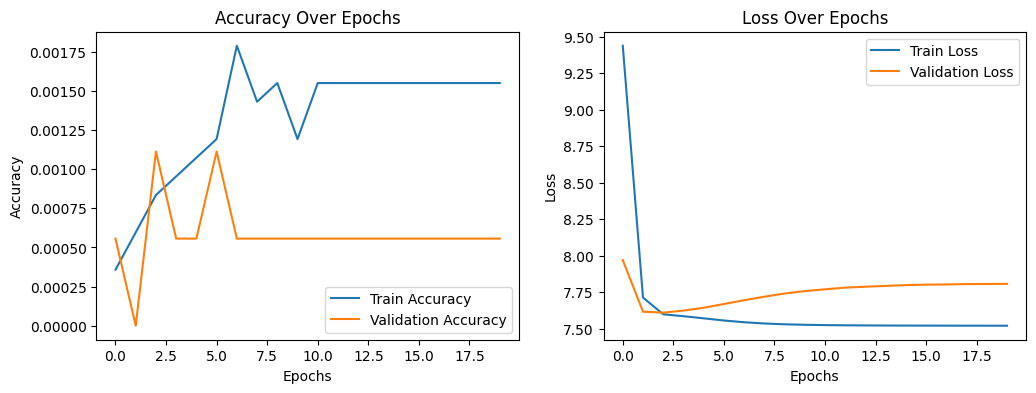

In [ ]:
# Visualize
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

In [ ]:
# Save model
model.save('/content/drive/MyDrive/Colab Notebooks/Final Project/asl_cnn_model3.keras')

In [ ]:
# Terminate runtime
!kill -9 -1

In [ ]:
# Test
sample_data = X_test[0]
sample_data = np.expand_dims(sample_data, axis=0)
prediction = model.predict(sample_data)
print(f'Predicted Class: {np.argmax(prediction)}')